<a href="https://colab.research.google.com/github/phmouras/Critical-Phenomena-in-gravitational-collapse-via-spectral-methods/blob/main/MS_spherical_DD_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


# Truncation ordem
N1 = 50             # 1st domain [0, r0]

N2 = 50             # 2nd domain [r0, ∞)

# Map parameter

L0 = 1

# Collocation points

x0 = 0

r0 = L0*(1+x0)/(1-x0)   # r(x)

#x0 = (r0 - L0)/(r0 + L0)    # x(r)

r0_col = 1/(r0+L0) - (r0-L0)/(r0+L0)**2      # dx0/dr0
rr0_col = -2/(r0+L0)**2 + 2*(r0-L0)/(r0+L0)**3    # d²x0/dr0²

# 1st domain:
col_1 = np.cos(np.arange(2*N1 + 1)*math.pi /(2*N1))   # [0, 1]   # interface not included (verified)

x1_col = np.flip(col_1)

x1 = x1_col[N1:2*N1]

r1 = r0*x1                                    # physical domain (verified); x = r/r0

r1_col = 1/r0       # dx1/dr1

rr1_col = 0         # d^2 x1/dr1^2

# 2st domain:
col_2 = np.cos(np.arange(N2 + 2)*math.pi /(N2 + 1))   # [-1, 1]   # interface not included (verified)

x2_col = np.flip(col_2)

x2 = x2_col[1:N2+1]

r2 = r0 + L0*(1+x2)/(1-x2)                    # physical domain (verified)

#x2 = (r2-r0-L0)/(r2-r0+L0)

r2_col =  1/(r2-r0+L0) - (r2-r0-L0)/(r2-r0+L0)**2   # dx2/dr2

rr2_col = -2/(r2-r0+L0)**2 + 2*(r2-r0-L0)/(r2-r0+L0)**3

#r_short = np.hstack((r1,r2))
r = np.hstack((r1,r2))

# Base Functions:

# 1st domain:

TB1 = np.zeros([2*N1+3,N1])

TB1[0,] = 1
TB1[1,] = x1

for i in range(2,2*N1+3):
  TB1[i,] = 2*x1*TB1[i-1,] - TB1[i-2,]

TB1_pair = TB1[0:2*N1+1:2,:]
TB1_odd = TB1[1:2*N1+2:2,:]

# 1st Derivative
rTB1 = np.zeros([2*N1+3,N1])
colTB1 = np.zeros([2*N1+3,N1])

colTB1[0,] = 0
colTB1[1,] = 1
rTB1[0,] = r1_col*colTB1[0,]
rTB1[1,] = r1_col*colTB1[1,]

for i in range(2, 2*N1+3):
  colTB1[i,] = 2*x1*colTB1[i-1,] + 2*TB1[i-1,] - colTB1[i-2,]
  rTB1[i,] = r1_col*colTB1[i,]

rTB1_pair = rTB1[0:2*N1+1:2,:]     # Verified
rTB1_odd = rTB1[1:2*N1+2:2,:]     # Verified

# 2nd Derivative
rrTB1 = np.zeros([2*N1+3,N1])
ccolTB1 = np.zeros([2*N1+3,N1])

ccolTB1[0,] = 0
ccolTB1[1,] = 0
rrTB1[0,] = rr1_col*colTB1[0,] + (r1_col)**2 * ccolTB1[0,]
rrTB1[1,] = rr1_col*colTB1[1,] + (r1_col)**2 * ccolTB1[1,]

for i in range(2, 2*N1+3):
  ccolTB1[i,] = 2*colTB1[i-1,] + 2*x1*ccolTB1[i-1,] + 2*colTB1[i-1,] - ccolTB1[i-2,]
  rrTB1[i,] = rr1_col*colTB1[i,] + (r1_col)**2 * ccolTB1[i,]                         # ccolTB1[i,] = d²TB1[i,]/dcol²

rrTB1_pair = rrTB1[0:2*N1+1:2,:]

# Basis function for 1st domain:
psi_1 = np.hstack((TB1_pair,np.zeros([N1+1,N1])))   # [N1+1, N1+N2+2]      # Verified

rpsi_1 = np.hstack((rTB1_pair,np.zeros([N1+1,N1])))   #     # Verified

rrpsi_1 = np.hstack((rrTB1_pair,np.zeros([N1+1,N1])))   #     # Verified

# Second domain:

TL2 = np.zeros([N2+2,N2])

TL2[0,] = 1
TL2[1,] = x2

for i in range(2,N2+2):
  TL2[i,] = 2*x2*TL2[i-1,] - TL2[i-2,]

# 1st Derivative
rTL2 = np.zeros([N2+2,N2])
colTL2 = np.zeros([N2+2,N2])

colTL2[0,] = 0
colTL2[1,] = 1
rTL2[0,] = r2_col*colTL2[0,]
rTL2[1,] = r2_col*colTL2[1,]

for i in range(2, N2+2):
  colTL2[i,] = 2*x2*colTL2[i-1,] + 2*TL2[i-1,] - colTL2[i-2,]
  rTL2[i,] = r2_col*colTL2[i,]

# 2nd Derivative
rrTL2 = np.zeros([N2+2,N2])
ccolTL2 = np.zeros([N2+2,N2])

ccolTL2[0,] = 0
ccolTL2[1,] = 0
rrTL2[0,] = rr2_col*colTL2[0,] + (r2_col)**2 * ccolTL2[0,]
rrTL2[1,] = rr2_col*colTL2[1,] + (r2_col)**2 * ccolTL2[1,]

for i in range(2, N2+2):
  ccolTL2[i,] = 2*colTL2[i-1,] + 2*x2*ccolTL2[i-1,] + 2*colTL2[i-1,] - ccolTL2[i-2,]
  rrTL2[i,] = rr2_col*colTL2[i,] + (r2_col)**2 * ccolTL2[i,]                         # ccolTL2[i,] = d²TL2[i,]/dcol²

# Linear combinations of TL2, rTL2 and rrTL2
SB2 = 1/2*(TL2[1:N2+2,:] - TL2[0:N2+1,:])
rSB2 = 1/2*(rTL2[1:N2+2,:] - rTL2[0:N2+1,:])
rrSB2 = 1/2*(rrTL2[1:N2+2,:] - rrTL2[0:N2+1,:])



# Basis function for 2st domain:
psi_2 = np.hstack((np.zeros([N2+1,N2]), SB2))

rpsi_2 = np.hstack((np.zeros([N2+1,N2]), rSB2))

rrpsi_2 = np.hstack((np.zeros([N2+1,N2]), rrSB2))


# Final Base function: 1 + 2 Subdomains - Interface not included
psi_tst = np.vstack((psi_1, psi_2))         # Verified

# TRANSMISSION CONDITIONS:


# 1st domain: r0 = 1
TB1_r0 = np.zeros([2*N1+2])     # TB1(r0)

r01 = 1

TB1_r0[0] = 1
TB1_r0[1] = r01

for i in range(2,2*N1+2):
  TB1_r0[i] = 2*r01*TB1_r0[i-1] - TB1_r0[i-2]

TB1_r0_pair = TB1_r0[0:2*N1+1:2]

# 1st Derivative
rTB1_r0 = np.zeros([2*N1+2])
#colTB1_r0 = np.zeros([2*N1+2])

#colTB1_r0[0] = 0
#colTB1_r0[1] = 1
#rTB1_r0[0] = r0_col*colTB1_r0[0]
#rTB1_r0[1] = r0_col*colTB1_r0[1]
rTB1_r0[0] = 0
rTB1_r0[1] = 1

for i in range(2, 2*N1+2):
  rTB1_r0[i] = 2*r01*rTB1_r0[i-1] + 2*TB1_r0[i-1] - rTB1_r0[i-2]
#  rTB1_r0[i] = r0_col*colTB1_r0[i]

rTB1_r0_pair = rTB1_r0[0:2*N1+1:2]     # Verified

#blargh0 = max(rTB1_r0_pair_tst)

#rTB1_r0_pair = rTB1_r0_pair_tst/blargh0


#psi_1_cc = np.hstack((np.ones(N1),TB1_r0_pair))   # [N1+1, N1+N2+2]      # Verified
#psi_2_cc

# 2nd domain. r0 = -1

r02 = -1

TL2_r0 = np.zeros([N2+2])     # TL2(r0)

TL2_r0[0] = 1
TL2_r0[1] = r02

for i in range(2,N2+2):
  TL2_r0[i] = 2*r02*TL2_r0[i-1] - TL2_r0[i-2]

# Derivative
rTL2_r0 = np.zeros([N2+2])
#colTL2_r0 = np.zeros([N2+2])

#colTL2_r0[0] = 0
#colTL2_r0[1] = 1
#rTL2_r0[0] = r0_col*colTL2_r0[0]
#rTL2_r0[1] = r0_col*colTL2_r0[1]
rTL2_r0[0] = 0
rTL2_r0[1] = 1

for i in range(2, N2+2):
  #colTL2_r0[i] = 2*x0*colTL2_r0[i-1] + 2*TL2_r0[i-1] - colTL2_r0[i-2]
  rTL2_r0[i] =  2*r02*rTL2_r0[i-1] + 2*TL2_r0[i-1] - rTL2_r0[i-2]


SB2_r0 = 1/2*(TL2_r0[1:N2+2] - TL2_r0[0:N2+1])
#rSB2_r0 = 1/2*(rTL2_r0[1:N2+2] - rTL2_r0[0:N2+1])
rSB2_r0 = L0*(2/L0)*1/2*(rTL2_r0[1:N2+2] - rTL2_r0[0:N2+1])


blargh0 = max(rTB1_r0_pair)

psi_cc = np.hstack((TB1_r0_pair, - SB2_r0))         # psi_1(r0) - psi_2(r0) => phi_1(r0) - phi_2(r0)
rpsi_cc = np.hstack((rTB1_r0_pair/blargh0, - rSB2_r0/blargh0))         # rpsi_1(r0) - rpsi_2(r0) => rphi_1(r0) - rphi_2(r0)

CC = np.vstack((psi_cc, rpsi_cc))
#rCC = np.vstack((rpsi_cc, rrpsi_cc))


# Final Base functions:
psi = np.hstack((psi_tst, CC.T))
rpsi = np.vstack((rpsi_1, rpsi_2))      # Verified
rrpsi = np.vstack((rrpsi_1, rrpsi_2))    # Verified
#rpsi = np.hstack((rpsi_tst, rCC.T))



In [183]:
# Field Functions:

# Initial conditions of Phi (Scalar field):

sigma = 1

A0 = 0.05   # 0.085 -> disperses ;

#r = np.concatenate((r_short,[0,0]))

Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

Phi_0 = np.hstack((Phi_init, np.zeros(2)))

inv_psi = np.linalg.pinv(psi)

a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  VERIFICADO

Phi = np.dot(a0, psi)

rPhi = np.concatenate((np.dot(a0, rpsi),[0,0]))
rrPhi = np.concatenate((np.dot(a0, rpsi),[0,0]))



# Na interface r = r0 (x=0): Phi_1(r0) = Phi_2(r0)
print("Verificação na interface:")
print("Φ1(r0):", np.dot(a0[:N1+1], TB1_r0_pair))
print("Φ2(r0):", np.dot(a0[N1+1:N1+N2+2], SB2_r0))
print("Φ1(r0) - Φ2(r0):", np.dot(psi_cc, a0))  # Deve ser ≈0

Verificação na interface:
Φ1(r0): 0.05091578189245784
Φ2(r0): 0.050915781892457955
Φ1(r0) - Φ2(r0): -1.1331020793622097e-16


In [184]:
rPhi.shape

(102,)

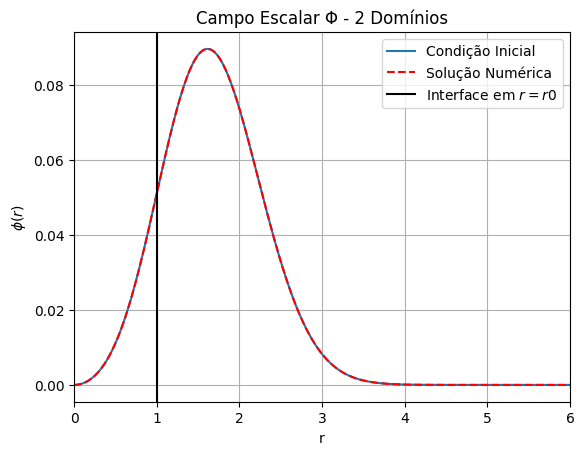

In [185]:

########################### Plot: Initial Conditions of Phi

M = 1000       # plot truncation

rplot1 = np.linspace(0, 0.9999999, M//2)      # Primeiro domínio (0, L0]
rplot2 = np.linspace(r0, 10, M//2)            # Segundo domínio  [L0, ∞)
rplot = np.concatenate((rplot1, rplot2))

xplot1 = rplot1/r0
xplot2 = (rplot2 - r0 - L0)/(rplot2 - r0 + L0)

TB1_plot = np.zeros([2*N1+2,len(rplot1)])
TB1_plot[0,] = 1
TB1_plot[1,] = xplot1

for i in range(2,2*N1+2):
  TB1_plot[i,] = 2*xplot1*TB1_plot[i-1,] - TB1_plot[i-2,]

TB1_pair_plot = TB1_plot[0:2*N1+1:2,:]

psiplot_1 = np.hstack((TB1_pair_plot,np.zeros([N1+1, len(rplot2)])))   # [N1+1, N1+N2+2]      # Verified

TL2_plot = np.zeros([N2+2,len(rplot2)])

TL2_plot[0,] = 1
TL2_plot[1,] = xplot2

for i in range(2,N2+2):
  TL2_plot[i,] = 2*xplot2*TL2_plot[i-1,] - TL2_plot[i-2,]

SB2_plot = 1/2*(TL2_plot[1:N2+2,:] - TL2_plot[0:N2+1,:])

psiplot_2 = np.hstack((np.zeros([N2+1,len(rplot1)]), SB2_plot)) # SB2_plot[0:N2+1, 0:-1] -> Recorte da última coluna de SB2_plot

psiplot = np.vstack((psiplot_1, psiplot_2))

Phiplot = np.dot(a0, psiplot)

Phi_init0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))

#erro = abs(Phiplot_0 - Phiplot)

#rplot_extended = np.concatenate([rplot, [0, 0]])  # Adiciona a interface duas vezes (para Φ e dΦ/dr)

plt.plot(rplot, Phi_init0, label='Condição Inicial')
plt.plot(rplot, Phiplot, 'r--', label='Solução Numérica')  # Assegurar mesma dimensão
plt.xlabel('r')
plt.xlim(0,6)
plt.ylabel(r'$\phi(r)$')
plt.title('Campo Escalar Φ - 2 Domínios')
plt.axvline(x=r0, color='k', label='Interface em $r=r0$')
plt.legend()
plt.grid(True)
plt.show()




In [186]:

Pi_0 = np.zeros(N1+N2+2)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

rPi_tst = np.dot(a0, rpsi)
rPi = np.concatenate((rPi_tst[0:N1+N2],[0,0]))

# Base functions for Krr: Without transmission condition
ck0 = 0

# 1st domain: 1/2*(TB1(2*k+2,r)+TB1(2*k,r))

SB1_init = 1/2*(TB1[2:2*N1+1:2,:] + TB1_pair[0:N1,:])   #ou
rSB1_init = 1/2*(rTB1[2:2*N1+1:2,:] + rTB1_pair[0:N1,:])

SB1_r0 = 1/2*(TB1_r0[2:2*N1+1:2] - TB1_r0_pair[0:N1])
rSB1_r0 = 1/2*(rTB1_r0[2:2*N1+1:2] - rTB1_r0_pair[0:N1])

# 2nd domain: SB2(k,r)

SB1_1 = np.hstack((SB1_init, np.zeros([N1,N1])))  #
rSB1_1 = np.hstack((rSB1_init, np.zeros([N1,N1])))

SB1_2 = np.hstack((np.zeros([N2+1,N2]), SB2[0:N2+1,:]))   #ou
rSB1_2 = np.hstack((np.zeros([N2+1,N2]), rSB2[0:N2+1,:]))

# Condição de transmissão para Krr:

SB1_cc = np.hstack((TB1_r0_pair[0:N1], - SB2_r0))
rSB1_cc = np.hstack((rSB1_r0[0:N1]/blargh0, - rSB2_r0/blargh0))

CCK = np.vstack((SB1_cc, rSB1_cc))

SB1_tst = np.vstack((SB1_1, SB1_2))

SB1 = np.hstack((SB1_tst, CCK.T))   # [N1+N2, N1+N2+1]

rSB1 = np.vstack((rSB1_1, rSB1_2))


#SB1 = np.hstack((SB1_tst, CC.T[0:N1+N2]))   # [N1+N2, N1+N2+1]

# Initial data for Chi
c0 = np.zeros([N1+N2+2])     # guess value
for i in range(N1+N2+2):
  c0[i]  =   0.0001

Chi = np.dot(c0,psi)
rChi = np.concatenate((np.dot(c0, rpsi),[0,0]))
rrChi = np.concatenate((np.dot(c0, rrpsi),[0,0]))



V = 0

coeforigin = np.concatenate([[0],-4*(-1)**np.arange(1, N1+1)*np.arange(1, N1+1)**2/r0**2])

tol = 1e-18
n = 0
nf = 50

# Newton Raphson loop
while n <= nf:
  Chi=np.dot(c0,psi)
  rChi = np.concatenate((np.dot(c0, rpsi),[0,0]))
  rrChi = np.concatenate((np.dot(c0, rrpsi),[0,0]))
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0[0:N1+1]) + 1/2*(rPhi[0])**2
  H0_int=4*rChi[1:N1+N2]**2 + 4*rrChi[1:N1+N2]+ 8/r[1:N1+N2]*rChi[1:N1+N2] + 1/2*rPhi[1:N1+N2]**2;
  H0 = np.hstack((H0_0, H0_int, np.dot(psi_cc,c0), np.dot(rpsi_cc,c0)))
  J1 = rChi[0:N1+N2]*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*np.concatenate((coeforigin,np.zeros(N2+1)))
  JH_int = 8*J1[:,1:N1+N2] + 4*rrpsi[:,1:N1+N2] + 8/r[1:N1+N2]*rpsi[:,1:N1+N2]
  JH = np.column_stack((JH_0, JH_int, psi_cc, rpsi_cc))
  inv_JH = np.linalg.pinv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
  print(max(err))
  if  max(err) <= tol:
    break
  n = n + 1
#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


0.032138310558849525
0.03383968364959813
0.0007217461564557842
1.6280424084682762e-07
5.788772239334605e-15
1.3010426069826053e-18
3.0357660829594124e-18
1.3010426069826053e-18
8.673617379884035e-19


In [189]:
np.dot(SB1_cc,ck0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

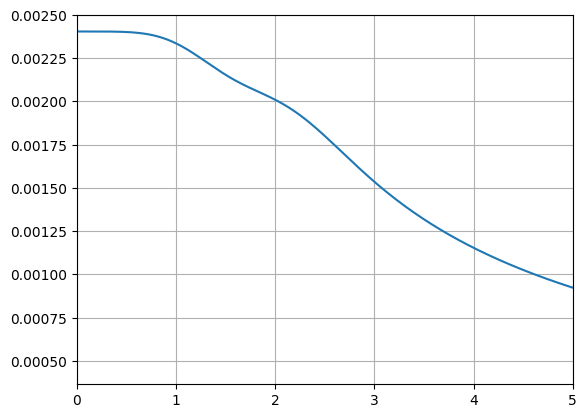

In [191]:
Chiplot = np.dot(c0, psiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.grid()
plt.show()

Quadrature Integration

In [194]:
# Base Functions:

# 1st domain:

Nq1 = int(3/2*N1)           # Quadrature truncation

new_col_1, wq1 = np.polynomial.legendre.leggauss(Nq1 + 1)

# Legendre Polinomials

rq1 = r0/2*(1 + new_col_1)            # Physical quadrature domain

qTB1 = np.zeros([2*Nq1+2,Nq1+1])

qTB1[0,] = 1
qTB1[1,] = new_col_1

for i in range(2,2*Nq1+2):
  qTB1[i,] = 2*new_col_1*qTB1[i-1,] - qTB1[i-2,]

qTB1_pair = qTB1[0:2*Nq1+1:2,:]

# 1st Derivative
qrTB1 = np.zeros([2*Nq1+2,Nq1+1])
qcolTB1 = np.zeros([2*Nq1+2,Nq1+1])

qcolTB1[0,] = 0
qcolTB1[1,] = 1
qrTB1[0,] = r1_col*qcolTB1[0,]
qrTB1[1,] = r1_col*qcolTB1[1,]

for i in range(2, 2*N1+2):
  qcolTB1[i,] = 2*new_col_1*qcolTB1[i-1,] + 2*qTB1[i-1,] - qcolTB1[i-2,]
  qrTB1[i,] = r1_col*qcolTB1[i,]

qrTB1_pair = rTB1[0:2*Nq1+1:2,:]     # Verified

# 2nd Derivative
qrrTB1 = np.zeros([2*Nq1+2,Nq1+1])
qccolTB1 = np.zeros([2*Nq1+2,Nq1+1])

qccolTB1[0,] = 0
qccolTB1[1,] = 0
qrrTB1[0,] = rr1_col*qcolTB1[0,] + (r1_col)**2 * qccolTB1[0,]
qrrTB1[1,] = rr1_col*qcolTB1[1,] + (r1_col)**2 * qccolTB1[1,]

for i in range(2, 2*Nq1+2):
  qccolTB1[i,] = 2*qcolTB1[i-1,] + 2*new_col_1*qccolTB1[i-1,] + 2*qcolTB1[i-1,] - qccolTB1[i-2,]
  qrrTB1[i,] = rr1_col*qcolTB1[i,] + (r1_col)**2 * qccolTB1[i,]                         # ccolTB1[i,] = d²TB1[i,]/dcol²

qrrTB1_pair = rrTB1[0:2*N1+1:2,:]

# Basis function for 1st domain:
qpsi_1 = np.hstack((TB1_pair,np.zeros([N1+1,N1])))   # [N1+1, N1+N2+2]      # Verified

qrpsi_1 = np.hstack((rTB1_pair,np.zeros([N1+1,N1])))   #     # Verified

qrrpsi_1 = np.hstack((rrTB1_pair,np.zeros([N1+1,N1])))   #     # Verified

# Second domain:

Nq2 = int(3/2*N2)           # Quadrature truncation


# 1. Definir o polinômio de Legendre P_Nq2(y) e sua derivada
coeff = [0] * Nq2 + [1]  # Coeficientes de P_Nq2(y) = y^Nq2 + ...
poly = np.polynomial.legendre.Legendre(coeff)
poly_deriv = poly.deriv(new_col_2)  # Derivada P'_Nq2(y)



qTL2 = np.zeros([Nq2+2,Nq2+1])

qTL2[0,] = 1
qTL2[1,] = new_col_2

for i in range(2,N2+2+1):
  qTL2[i,] = 2*new_col_2*qTL2[i-1,] - qTL2[i-2,]

# 1st Derivative
qrTL2 = np.zeros([Nq2+2,Nq2+1])
qcolTL2 = np.zeros([Nq2+2,Nq2+1])

qcolTL2[0,] = 0
qcolTL2[1,] = 1
qrTL2[0,] = r2_col*qcolTL2[0,]
qrTL2[1,] = r2_col*qcolTL2[1,]

for i in range(2, N2+2):
  qcolTL2[i,] = 2*new_col_2*qcolTL2[i-1,] + 2*qTL2[i-1,] - qcolTL2[i-2,]
  qrTL2[i,] = r2_col*qcolTL2[i,]

# 2nd Derivative
qrrTL2 = np.zeros([Nq2+2,Nq2+1])
qccolTL2 = np.zeros([Nq2+2,Nq2+1])

qccolTL2[0,] = 0
qccolTL2[1,] = 0
qrrTL2[0,] = rr2_col*qcolTL2[0,] + (r2_col)**2 * qccolTL2[0,]
qrrTL2[1,] = rr2_col*qcolTL2[1,] + (r2_col)**2 * qccolTL2[1,]

for i in range(2, Nq2+2):
  qccolTL2[i,] = 2*qcolTL2[i-1,] + 2*new_col_2*qccolTL2[i-1,] + 2*qcolTL2[i-1,] - qccolTL2[i-2,]
  qrrTL2[i,] = rr2_col*qcolTL2[i,] + (r2_col)**2 * qccolTL2[i,]                         # ccolTL2[i,] = d²TL2[i,]/dcol²

# Linear combinations of TL2, rTL2 and rrTL2
qSB2 = 1/2*(qTL2[1:N2+2,:] - qTL2[0:N2+1,:])
qrSB2 = 1/2*(qrTL2[1:N2+2,:] - qrTL2[0:N2+1,:])
qrrSB2 = 1/2*(qrrTL2[1:N2+2,:] - qrrTL2[0:N2+1,:])


# Basis function for 2st domain:
qpsi_2 = np.hstack((np.zeros([Nq2+1,Nq2]), qSB2))

qrpsi_2 = np.hstack((np.zeros([Nq2+1,Nq2]), qrSB2))

qrrpsi_2 = np.hstack((np.zeros([Nq2+1,Nq2]), qrrSB2))


# Final Base function: 1 + 2 Subdomains - Interface not included
qpsi_tst = np.vstack((qpsi_1, qpsi_2))         # Verified

# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi)


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1)

# Alpha na origem

#psi_0 = np.zeros(N+1)

#for i in range(N+1):
#  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2

#Alpha_0 = 1 + np.dot(al0, psi_0)


NameError: name 'new_col_2' is not defined

In [196]:
# Base functions for Beta

# 1st domain: TB1(2*k+1,r)
# 2nd domain: SB2(k,r)


SB1_2 = np.hstack((np.zeros([N2+1,N2]), SB2[0:N2+1,:]))   #ou
rSB1_2 = np.hstack((np.zeros([N2+1,N2]), rSB2[0:N2+1,:]))

SB1_r0 = 1/2*(TB1_r0[2:2*N1+1:2] - TB1_r0_pair[0:N1])
rSB1_r0 = 1/2*(rTB1_r0[2:2*N1+1:2] - rTB1_r0_pair[0:N1])

SB3_1 = np.hstack((TB1_odd[0:N1], np.zeros([N1,N1])))
rSB3_1 = np.hstack((rTB1_odd[0:N1], np.zeros([N1,N1])))

SB3_2 = np.hstack((np.zeros([N2+1,N2]), SB2[0:N2+1,:]))
rSB3_2 = np.hstack((np.zeros([N2+1,N2]), rSB2[0:N2+1,:]))

SB3_tst = np.vstack((SB3_1, SB3_2))

SB3 = np.hstack((SB3_tst, CCK.T))   # [N1+N2, N1+N2+1]

rSB3 = np.vstack((rSB3_1, rSB3_2))

# Runge Kutta 4th order

h = 0.001   # step size
tf = 7

It = int(tf/h)

t = 0

Alpha_origin = []
phi_origin = []
L2HC = []
phi_set0 = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

# AJEITAR AS DIMENSOES DAS MATRIZES NO INTEGRADOR
while t <= tf:

  # First step
  Phi = np.dot(a0, psi)
  rPhi = np.concatenate((np.dot(a0, rpsi),[0,0]))
  rrPhi = np.concatenate((np.dot(a0, rrpsi),[0,0]))
  Pi = np.dot(b0, psi)
  rPi = np.concatenate((np.dot(b0, rpsi),[0,0]))
  Chi = np.dot(c0, psi)
  rChi = np.concatenate((np.dot(c0, rpsi),[0,0]))
  rrChi = np.concatenate((np.dot(c0, rrpsi),[0,0]))
  Matrix_Krr_1 = 2*rChi[1:N1+N2]*SB1[:,1:N1+N2] + rSB1[:,1:N1+N2] + 3/r[1:N1+N2]*SB1[:,1:N1+N2] # [N1+N2+1, N1+N2+1]
  Matrix_Krr = np.hstack((Matrix_Krr_1,CCK.T))
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N1+N2+2]*rPhi[1:N1+N2+2]*np.exp(4*Chi[1:N1+N2+2])  # [N1+N2+1]
  ck0 = np.dot(rhsk, inv_matrix_krr)  # [N1+N2+1]
  Krr = np.dot(ck0, SB1)
  rKrr = np.concatenate((np.dot(ck0, rSB1),[0,0]))
  Matrix_Alpha_0 = rrpsi[:,0]  - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N1+N2] + 2*(1/r[1:N1+N2] + rChi[1:N1+N2])*rpsi[:,1:N1+N2] - 3/2*np.exp(-4*Chi[1:N1+N2])*Krr[1:N1+N2]**2*psi[:,1:N1+N2] - np.exp(4*Chi[1:N1+N2])*(Pi[1:N1+N2]**2 - V)*psi[:,1:N1+N2]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int, psi_cc, rpsi_cc))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.concatenate((np.dot(al0, rpsi),[0,0]))
  rrAlpha = np.concatenate((np.dot(al0, rrpsi),[0,0]))
  Matrix_Beta_1 = rSB3[:,1:N1+N2] - SB3[:,1:N1+N2]/r[1:N1+N2]
  Matrix_Beta = np.hstack((Matrix_Beta_1,CCK.T))
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N1+N2+2]*np.exp(-4*Chi[1:N1+N2+2])*Krr[1:N1+N2+2]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB3)
  rBeta = np.concatenate((np.dot(be0, rSB3),[0,0]))
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0[0:N1+1], coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N1+N2]*rPi[1:N1+N2] + np.exp(-4*Chi[1:N1+N2])*(2*Alpha[1:N1+N2]/r[1:N1+N2] + rAlpha[1:N1+N2] + 2*rChi[1:N1+N2]*Alpha[1:N1+N2])*rPhi[1:N1+N2] + np.exp(-4*Chi[1:N1+N2])*Alpha[1:N1+N2]*rrPhi[1:N1+N2] - Alpha[1:N1+N2]*V
  db0 = np.hstack((db_origin, db_int, np.dot(psi_cc,b0), np.dot(rpsi_cc,b0)))
  db = np.dot(db0, inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K1 = h*(dc)
  L1 = h*(da)
  F1 = h*(db)

  # L2-error associated to the Hamiltonian constraint
#  qPhi = np.dot(a0, qpsi)
#  rqPhi= np.dot(a0, rqpsi)
#  qPi = np.dot(b0, qpsi)
#  qChi = np.dot(c0, qpsi)
#  rqChi = np.dot(c0, rqpsi)
#  rrqChi = np.dot(c0, rrqpsi)
#  qKrr = np.dot(ck0, qSB1)
#  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
#  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC

  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')

  # Phi origin:
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')

  # Second step
  Phi = np.dot(a0 + L1/2, psi)
  rPhi = np.concatenate((np.dot(a0 + L1/2 , rpsi),[0,0]))
  rrPhi = np.concatenate((np.dot(a0 + L1/2 , rrpsi),[0,0]))
  Pi = np.dot(b0 + F1/2, psi)
  rPi = np.concatenate((np.dot(b0 + F1/2, rpsi),[0,0]))
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.concatenate((np.dot(c0 + K1/2, rpsi),[0,0]))
  rrChi = np.concatenate((np.dot(c0 + K1/2, rrpsi),[0,0]))
  Matrix_Krr_1 = 2*rChi[1:N1+N2]*SB1[:,1:N1+N2] + rSB1[:,1:N1+N2] + 3/r[1:N1+N2]*SB1[:,1:N1+N2] # [N1+N2+1, N1+N2+1]
  Matrix_Krr = np.hstack((Matrix_Krr_1,CCK.T))
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N1+N2+2]*rPhi[1:N1+N2+2]*np.exp(4*Chi[1:N1+N2+2])  # [N1+N2+1]
  ck0 = np.dot(rhsk, inv_matrix_krr)  # [N1+N2+1]
  Krr = np.dot(ck0, SB1)
  rKrr = np.concatenate((np.dot(ck0, rSB1),[0,0]))
  Matrix_Alpha_0 = rrpsi[:,0]  - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N1+N2] + 2*(1/r[1:N1+N2] + rChi[1:N1+N2])*rpsi[:,1:N1+N2] - 3/2*np.exp(-4*Chi[1:N1+N2])*Krr[1:N1+N2]**2*psi[:,1:N1+N2] - np.exp(4*Chi[1:N1+N2])*(Pi[1:N1+N2]**2 - V)*psi[:,1:N1+N2]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int, psi_cc, rpsi_cc))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.concatenate((np.dot(al0, rpsi),[0,0]))
  rrAlpha = np.concatenate((np.dot(al0, rrpsi),[0,0]))
  Matrix_Beta_1 = rSB3[:,1:N1+N2] - SB3[:,1:N1+N2]/r[1:N1+N2]
  Matrix_Beta = np.hstack((Matrix_Beta_1,CCK.T))
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N1+N2+2]*np.exp(-4*Chi[1:N1+N2+2])*Krr[1:N1+N2+2]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB3)
  rBeta = np.concatenate((np.dot(be0, rSB3),[0,0]))
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0[0:N1+1], coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N1+N2]*rPi[1:N1+N2] + np.exp(-4*Chi[1:N1+N2])*(2*Alpha[1:N1+N2]/r[1:N1+N2] + rAlpha[1:N1+N2] + 2*rChi[1:N1+N2]*Alpha[1:N1+N2])*rPhi[1:N1+N2] + np.exp(-4*Chi[1:N1+N2])*Alpha[1:N1+N2]*rrPhi[1:N1+N2] - Alpha[1:N1+N2]*V
  db0 = np.hstack((db_origin, db_int, np.dot(psi_cc,b0), np.dot(rpsi_cc,b0)))
  db = np.dot(db0, inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K2 = h*(dc)
  L2 = h*(da)
  F2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)
  rPhi = np.concatenate((np.dot(a0 + L2/2 , rpsi),[0,0]))
  rrPhi = np.concatenate((np.dot(a0 + L2/2, rrpsi),[0,0]))
  Pi = np.dot(b0 + F2/2, psi)
  rPi = np.concatenate((np.dot(b0 + F2/2, rpsi),[0,0]))
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.concatenate((np.dot(c0 + K2/2, rpsi),[0,0]))
  rrChi = np.concatenate((np.dot(c0 + K2/2, rrpsi),[0,0]))
  Matrix_Krr_1 = 2*rChi[1:N1+N2]*SB1[:,1:N1+N2] + rSB1[:,1:N1+N2] + 3/r[1:N1+N2]*SB1[:,1:N1+N2] # [N1+N2+1, N1+N2+1]
  Matrix_Krr = np.hstack((Matrix_Krr_1,CCK.T))
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N1+N2+2]*rPhi[1:N1+N2+2]*np.exp(4*Chi[1:N1+N2+2])  # [N1+N2+1]
  ck0 = np.dot(rhsk, inv_matrix_krr)  # [N1+N2+1]
  Krr = np.dot(ck0, SB1)
  rKrr = np.concatenate((np.dot(ck0, rSB1),[0,0]))
  Matrix_Alpha_0 = rrpsi[:,0]  - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N1+N2] + 2*(1/r[1:N1+N2] + rChi[1:N1+N2])*rpsi[:,1:N1+N2] - 3/2*np.exp(-4*Chi[1:N1+N2])*Krr[1:N1+N2]**2*psi[:,1:N1+N2] - np.exp(4*Chi[1:N1+N2])*(Pi[1:N1+N2]**2 - V)*psi[:,1:N1+N2]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int, psi_cc, rpsi_cc))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.concatenate((np.dot(al0, rpsi),[0,0]))
  rrAlpha = np.concatenate((np.dot(al0, rrpsi),[0,0]))
  Matrix_Beta_1 = rSB3[:,1:N1+N2] - SB3[:,1:N1+N2]/r[1:N1+N2]
  Matrix_Beta = np.hstack((Matrix_Beta_1,CCK.T))
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N1+N2+2]*np.exp(-4*Chi[1:N1+N2+2])*Krr[1:N1+N2+2]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB3)
  rBeta = np.concatenate((np.dot(be0, rSB3),[0,0]))
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0[0:N1+1], coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N1+N2]*rPi[1:N1+N2] + np.exp(-4*Chi[1:N1+N2])*(2*Alpha[1:N1+N2]/r[1:N1+N2] + rAlpha[1:N1+N2] + 2*rChi[1:N1+N2]*Alpha[1:N1+N2])*rPhi[1:N1+N2] + np.exp(-4*Chi[1:N1+N2])*Alpha[1:N1+N2]*rrPhi[1:N1+N2] - Alpha[1:N1+N2]*V
  db0 = np.hstack((db_origin, db_int, np.dot(psi_cc,b0), np.dot(rpsi_cc,b0)))
  db = np.dot(db0, inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K3 = h*(dc)
  L3 = h*(da)
  F3 = h*(db)

  # Forth step
  Phi = np.dot(a0 + L3, psi)
  rPhi = np.concatenate((np.dot(a0 + L3 , rpsi),[0,0]))
  rrPhi = np.concatenate((np.dot(a0 + L3, rrpsi),[0,0]))
  Pi = np.dot(b0 + F3, psi)
  rPi = np.concatenate((np.dot(b0 + F3, rpsi),[0,0]))
  Chi = np.dot(c0 + K3, psi)
  rChi = np.concatenate((np.dot(c0 + K3, rpsi),[0,0]))
  rrChi = np.concatenate((np.dot(c0 + K3, rrpsi),[0,0]))
  Matrix_Krr_1 = 2*rChi[1:N1+N2]*SB1[:,1:N1+N2] + rSB1[:,1:N1+N2] + 3/r[1:N1+N2]*SB1[:,1:N1+N2] # [N1+N2+1, N1+N2+1]
  Matrix_Krr = np.hstack((Matrix_Krr_1,CCK.T))
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N1+N2+2]*rPhi[1:N1+N2+2]*np.exp(4*Chi[1:N1+N2+2])  # [N1+N2+1]
  ck0 = np.dot(rhsk, inv_matrix_krr)  # [N1+N2+1]
  Krr = np.dot(ck0, SB1)
  rKrr = np.concatenate((np.dot(ck0, rSB1),[0,0]))
  Matrix_Alpha_0 = rrpsi[:,0]  - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N1+N2] + 2*(1/r[1:N1+N2] + rChi[1:N1+N2])*rpsi[:,1:N1+N2] - 3/2*np.exp(-4*Chi[1:N1+N2])*Krr[1:N1+N2]**2*psi[:,1:N1+N2] - np.exp(4*Chi[1:N1+N2])*(Pi[1:N1+N2]**2 - V)*psi[:,1:N1+N2]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int, psi_cc, rpsi_cc))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.concatenate((np.dot(al0, rpsi),[0,0]))
  rrAlpha = np.concatenate((np.dot(al0, rrpsi),[0,0]))
  Matrix_Beta_1 = rSB3[:,1:N1+N2] - SB3[:,1:N1+N2]/r[1:N1+N2]
  Matrix_Beta = np.hstack((Matrix_Beta_1,CCK.T))
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N1+N2+2]*np.exp(-4*Chi[1:N1+N2+2])*Krr[1:N1+N2+2]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB3)
  rBeta = np.concatenate((np.dot(be0, rSB3),[0,0]))
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0[0:N1+1], coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N1+N2]*rPi[1:N1+N2] + np.exp(-4*Chi[1:N1+N2])*(2*Alpha[1:N1+N2]/r[1:N1+N2] + rAlpha[1:N1+N2] + 2*rChi[1:N1+N2]*Alpha[1:N1+N2])*rPhi[1:N1+N2] + np.exp(-4*Chi[1:N1+N2])*Alpha[1:N1+N2]*rrPhi[1:N1+N2] - Alpha[1:N1+N2]*V
  db0 = np.hstack((db_origin, db_int, np.dot(psi_cc,b0), np.dot(rpsi_cc,b0)))
  db = np.dot(db0, inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K4 = h*(dc)
  L4 = h*(da)
  F4 = h*(db)

  t = t + h
#  print(t)
#  if t > 9:
#    h=0.0001

  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (F1 + 2*F2 + 2*F3 + F4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  phi_set0.append(np.dot(a0, psiplot))

phi_set = np.array(phi_set0)

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

out_a.close()
out_p.close()

t1 = np.linspace(0, tf, len(Alpha_origin))

In [178]:
psiplot.shape

(32, 1000)

<ipython-input-181-9c2d30de8854>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


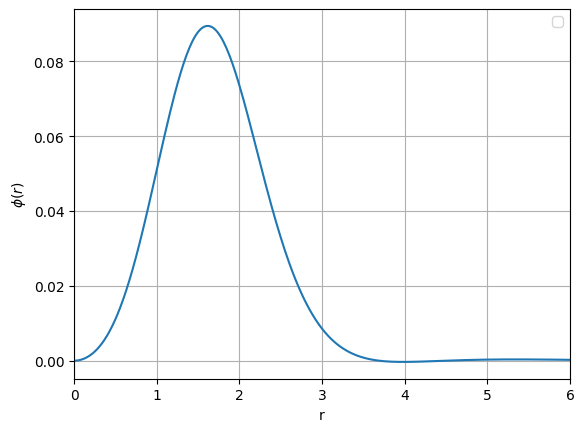

In [181]:
# Scalar Field Phi:

plt.plot(rplot, phi_set[0])  # Assegurar mesma dimensão
plt.xlabel('r')
plt.xlim(0,6)
plt.ylabel(r'$\phi(r)$')
#plt.axvline(x=r0, color='k', label='Interface em $r=r0$')
plt.legend()
plt.grid(True)
plt.show()

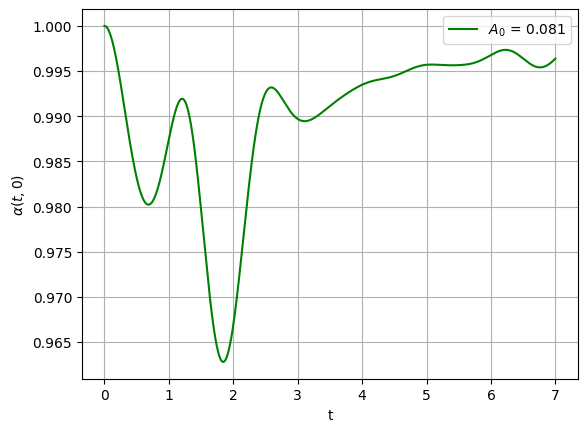

In [197]:
# Searching for critical amplitude:

Alpha_origin_disp = Alpha_origin
#Alpha_origin_collapse = Alpha_origin

plt.plot(t1, Alpha_origin_disp, color = "g", label = f"$A_0$ = {A0}")
#plt.plot(t1, Alpha_origin_collapse, color = "y", label = "$A_0$ = {:}".format(A0))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

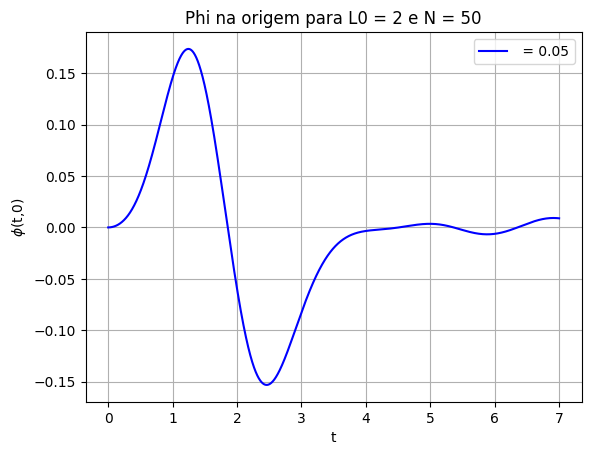

In [198]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N1) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")
plt.grid()
plt.legend()

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.title("log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")

NameError: name 't1' is not defined

In [ ]:
# Erro L2 of momentum constraint

plt.plot(t1,L2MC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
#plt.grid()
plt.title("log(L2MC) para $N = 50$, $L_0 = 2$")

In [ ]:
#L2HC_50_L02 = max(L2HC)
#L2HC_50_L05 = max(L2HC)
#L2HC_50_L010 = max(L2HC)

#L2HC_100_L02 = max(L2HC)
#L2HC_100_L05 = max(L2HC)
#L2HC_100_L010 = max(L2HC)

#L2HC_150_L02 = max(L2HC)
#L2HC_150_L05 = max(L2HC)
#L2HC_150_L010 = max(L2HC)

#L2HC_200_L02 = max(L2HC)
#L2HC_200_L05 = max(L2HC)
#L2HC_200_L010 = max(L2HC)

#L2HC_250_L02 = max(L2HC)
#L2HC_250_L05 = max(L2HC)
#L2HC_250_L010 = max(L2HC)

In [ ]:
# Code convergency for momentum contraint:

#L2MC_50_L02 = max(L2MC)
#L2MC_50_L05 = max(L2MC)
#L2MC_50_L010 = max(L2MC)

#L2MC_100_L02 = max(L2MC)
#L2MC_100_L05 = max(L2MC)
#L2MC_100_L010 = max(L2MC)

#L2MC_150_L02 = max(L2MC)
#L2MC_150_L05 = max(L2MC)
#L2MC_150_L010 = max(L2MC)

#L2MC_200_L02 = max(L2MC)
#L2MC_200_L05 = max(L2MC)
#L2MC_200_L010 = max(L2MC)

#L2MC_250_L02 = max(L2MC)
L2MC_250_L05 = max(L2MC)
#L2MC_250_L010 = max(L2MC)

In [ ]:
# Plot 3D from scalar field at t = constant:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6))
#ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[] # 5 plots from t = 0, .., 10
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


ax2.plot_surface(xn, yn, zn)


#ax1.plot(x, y)
#surf = ax2.plot_surface(xn, yn, zn, rstride = 1, cmap = 'viridis', edgecolor = 'none')
#fig.colorbar(surf, ax = ax2, shrink = 0.5, aspect = 5)  # adiciona barra de cores para a superfície 3D
#ax1.view_init(elev = 30, azim = 30)  # ajusta a perspectiva
#ax2.view_init(elev = 30, azim = 30)
#ax2.grid(False)
#plt.axis('off')
plt.show()

In [ ]:
phi_set[49999]

array([-0.26342508, -0.26149686, -0.25575876, ...,  0.02664143,
        0.02649835,  0.02635563])

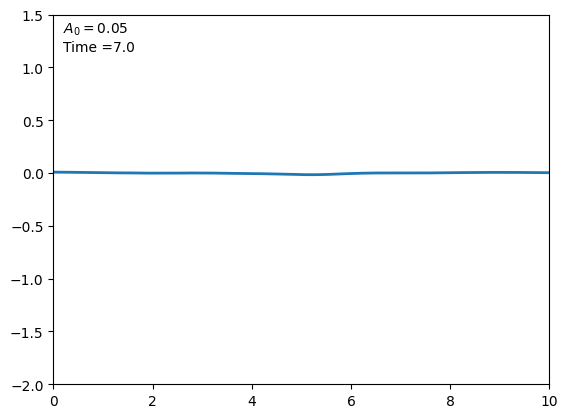

In [199]:
# Animation plot for Phi: Scalar Field

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl


fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-2, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

HTML(anim.to_html5_video())
#if A0 > 0.0819:
#    anim.save("animation_colapse.mp4")
#else:
#    anim.save("animation_dispersion.mp4")

